In [2]:
import numpy as np

In [3]:
import pandas as pd

In [6]:
dt = pd.read_csv(r"covid_19_data.csv")

In [5]:
from google.colab import files


uploaded = files.upload()

Saving covid_19_data.csv to covid_19_data.csv


In [7]:
dt.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [8]:
dt.count()

SNo                306429
ObservationDate    306429
Province/State     228329
Country/Region     306429
Last Update        306429
Confirmed          306429
Deaths             306429
Recovered          306429
dtype: int64

In [9]:
dt.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [10]:
import seaborn as sns

In [11]:
import matplotlib.pyplot as plt


<Axes: >

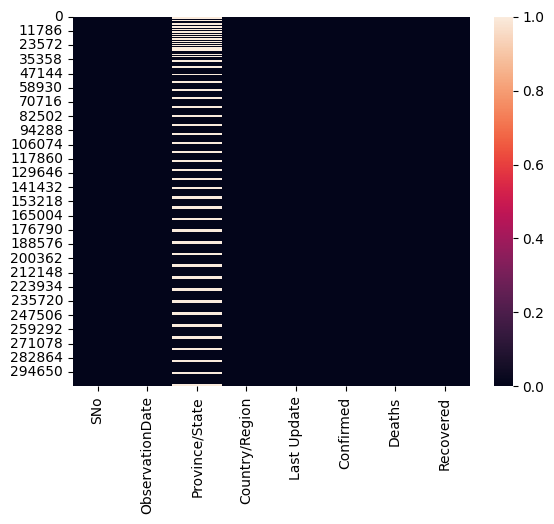

In [12]:
sns.heatmap(dt.isnull())

In [13]:
dt.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [14]:
dt.groupby("Province/State")['Confirmed'].sum().sort_values()

Province/State
Montgomery County, TX            0
Jervis Bay Territory             0
External territories             0
Recovered                        0
American Samoa                   0
                           ...    
Sao Paulo                521308945
Texas                    552039886
England                  666227518
Maharashtra              681186928
California               696898013
Name: Confirmed, Length: 737, dtype: int64

In [16]:
dt.groupby('Country/Region').sum()

<ipython-input-16-581c950047b4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt.groupby('Country/Region').sum()


,SNo,Confirmed,Deaths,Recovered
Country/Region,,,,
Azerbaijan,2738,1,0,0
"('St. Martin',)",4771,2,0,0
Afghanistan,62458515,17026442,669075,13464399
Albania,62414429,19768869,375955,13945256
Algeria,62455940,27684358,834464,18959299
...,...,...,...,...
West Bank and Gaza,62376640,41819444,440378,37003116
Yemen,62206925,962066,237613,506523
Zambia,62439888,13493953,205990,12625626


In [17]:
dt.groupby('Country/Region')['Confirmed','Recovered'].sum()

<ipython-input-17-31013b05f61b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt.groupby('Country/Region')['Confirmed','Recovered'].sum()


,Confirmed,Recovered
Country/Region,,
Azerbaijan,1,0
"('St. Martin',)",2,0
Afghanistan,17026442,13464399
Albania,19768869,13945256
Algeria,27684358,18959299
...,...,...
West Bank and Gaza,41819444,37003116
Yemen,962066,506523
Zambia,13493953,12625626


In [19]:
 dt.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=True).head(10)

Country/Region
China                    0
 Azerbaijan              1
Channel Islands          1
East Timor               1
North Ireland            1
Republic of the Congo    1
Cape Verde               1
The Gambia               1
St. Martin               2
('St. Martin',)          2
Name: Confirmed, dtype: int64

In [20]:
dt.Confirmed < 10

0          True
1         False
2          True
3          True
4          True
          ...  
306424    False
306425    False
306426    False
306427    False
306428    False
Name: Confirmed, Length: 306429, dtype: bool

In [23]:
dt = dt[~(dt.Confirmed < 10)]

In [24]:
dt

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26,0,0
13,14,01/22/2020,Hubei,Mainland China,1/22/2020 17:00,444,17,28
34,35,01/22/2020,Zhejiang,Mainland China,1/22/2020 17:00,10,0,0
41,42,01/23/2020,Beijing,Mainland China,1/23/20 17:00,22,0,0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,30-05-2021 04:20,102641,2335,95289
306425,306426,05/29/2021,Zeeland,Netherlands,30-05-2021 04:20,29147,245,0
306426,306427,05/29/2021,Zhejiang,Mainland China,30-05-2021 04:20,1364,1,1324
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,30-05-2021 04:20,87550,1738,83790
